In [1]:
!pip install matplotlib

In [2]:
from tensorflow import keras

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
print("Number of train images : ", x_train.shape[0])
print("Number of test images : ", x_test.shape[0])

print ("Number of channels : ", x_train.shape[3])
print("Image size : ", x_train.shape[1], x_train.shape[2])

class_names = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배','트럭' ]

Number of train images :  50000
Number of test images :  10000
Number of channels :  3
Image size :  32 32


In [6]:
!apt install fonts-nanum-coding

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum-coding
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,084 kB of archives.
After this operation, 4,613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum-coding all 2.5-2 [1,084 kB]
Fetched 1,084 kB in 1s (1,497 kB/s)
Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 123105 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-coding (2.5-2) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [7]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=path)

In [8]:
from tensorflow.keras.utils import to_categorical

NUM_CLASSES = 10
if y_test.shape[1] == 1:
  x_train = x_train/255.
  x_test = x_test/255.
  y_train = to_categorical(y_train, NUM_CLASSES)
  y_test = to_categorical(y_test, NUM_CLASSES)

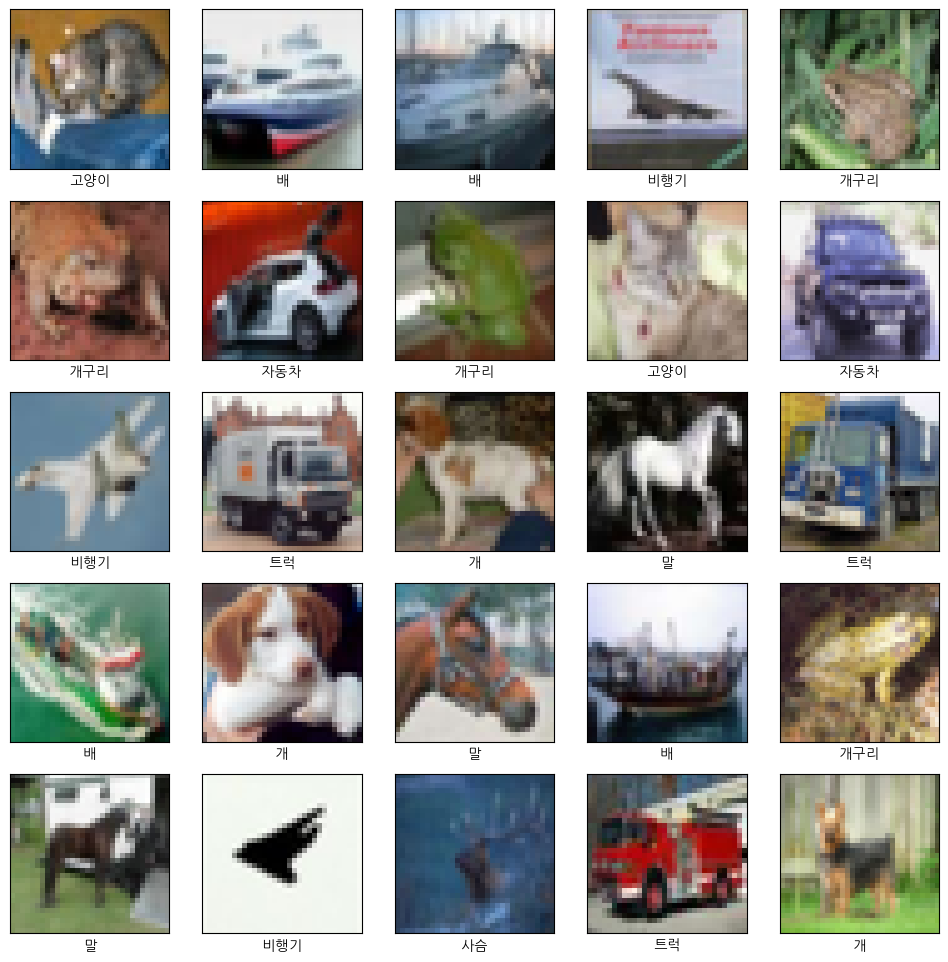

In [9]:
from matplotlib.offsetbox import FontProperties
plt.figure(figsize=(12,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_test[i].argmax()], fontproperties=fontprop)
plt.show()

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5582 - accuracy: 0.4284 - val_loss: 1.3059 - val_accuracy: 0.5254
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2105 - accuracy: 0.5683 - val_loss: 1.1547 - val_accuracy: 0.5951
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0615 - accuracy: 0.6266 - val_loss: 1.0710 - val_accuracy: 0.6223
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9626 - accuracy: 0.6623 - val_loss: 0.9867 - val_accuracy: 0.6594
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8790 - accuracy: 0.6911 - val_loss: 0.9481 - val_accuracy: 0.6708
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8164 - accuracy: 0.7149 - val_loss: 0.8741 - val_accuracy: 0.6978
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7686 - accuracy: 0.7297 - val_loss: 0.8698 - val_accurac

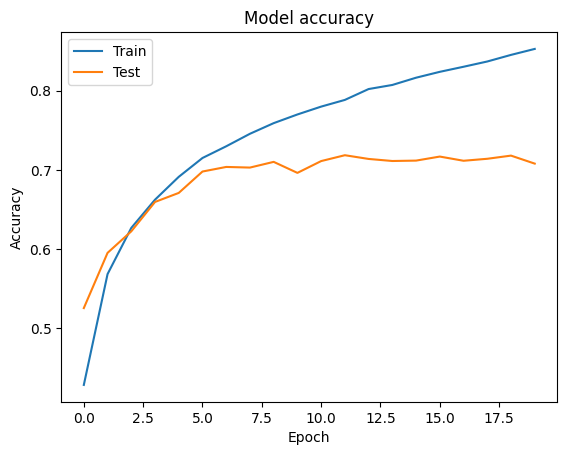

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

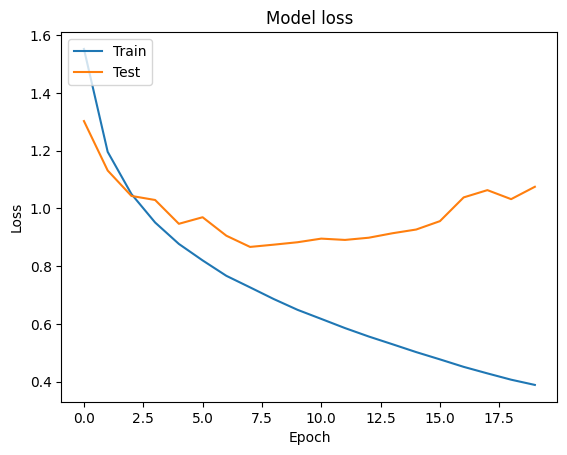

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy']
              )
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 14s 7ms/step - loss: 1.4840 - accuracy: 0.4558 - val_loss: 1.1424 - val_accuracy: 0.5947
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9854 - accuracy: 0.6516 - val_loss: 0.8807 - val_accuracy: 0.6928
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7843 - accuracy: 0.7275 - val_loss: 0.8153 - val_accuracy: 0.7149
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6603 - accuracy: 0.7688 - val_loss: 0.7750 - val_accuracy: 0.7367
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5717 - accuracy: 0.8018 - val_loss: 0.7347 - val_accuracy: 0.7523
Epoch 6/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4947 - accuracy: 0.8256 - val_loss: 0.7722 - val_accuracy: 0.7480
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4236 - accuracy: 0.8512 - val_loss: 0.7464 - val_ac

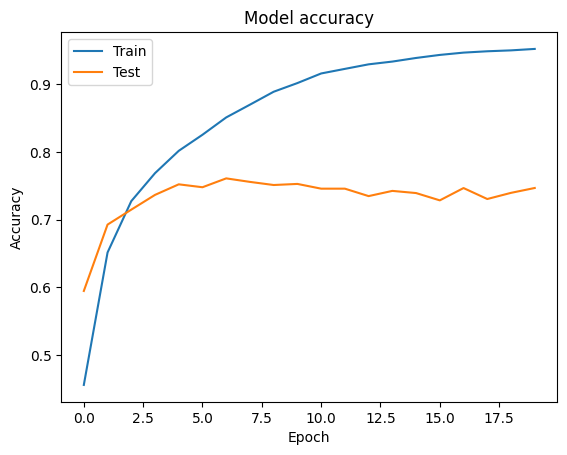

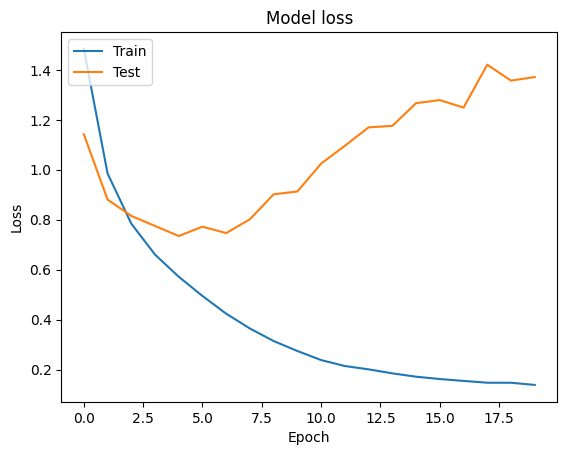

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()